In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.sans-serif"]=["SimHei"] #正常显示中文标签
plt.rcParams["axes.unicode_minus"]=False   #正常显示负号
import seaborn as sns

In [122]:
# data = pd.read_excel("./附件1.xlsx",sheet_name="红酒品质数据集")
data = pd.read_excel("./change.xlsx",sheet_name="红酒品质数据集")

In [123]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,7.0,0.340,0.10,3.5,0.044,17.0,63.0,0.99370,3.01,0.39,9.2,5
3894,5.9,0.435,0.16,6.4,0.031,21.0,134.0,0.99151,3.24,0.46,12.2,6
3895,7.0,0.250,0.33,2.1,0.021,17.0,76.0,0.99021,3.26,0.45,12.3,6
3896,6.7,0.260,0.29,7.7,0.038,40.0,140.0,0.99479,3.23,0.56,10.4,6


In [124]:
test=pd.read_excel("./附件1.xlsx",sheet_name="待预测数据集")

In [125]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.5,0.23,0.34,1.3,0.035,54.0,110.0,0.99176,3.07,0.55,11.0
1,6.0,0.21,0.30,8.7,0.036,47.0,127.0,0.99368,3.18,0.39,10.6
2,7.0,0.34,0.10,3.5,0.044,17.0,63.0,0.99370,3.01,0.39,9.2
3,4.8,0.65,0.12,1.1,0.013,4.0,10.0,0.99246,3.32,0.36,13.5
4,6.1,0.22,0.38,2.8,0.144,12.0,65.0,0.99080,2.95,0.64,11.4
...,...,...,...,...,...,...,...,...,...,...,...
995,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
996,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
997,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
998,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [126]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,6.966508,0.275507,0.341619,6.380195,0.045549,35.568625,140.847358,0.994223,3.193302,0.488653,10.449133,5.878143
std,0.843557,0.100190,0.122804,5.108090,0.021845,16.975192,43.338922,0.002989,0.153419,0.114040,1.207762,0.910847
min,4.200000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.210000,0.270000,1.700000,0.036000,23.000000,110.000000,0.991905,3.090000,0.410000,9.400000,5.000000
50%,6.900000,0.260000,0.320000,5.200000,0.043000,34.000000,138.000000,0.993900,3.180000,0.470000,10.300000,6.000000
75%,7.400000,0.320000,0.400000,9.800000,0.050000,46.000000,170.000000,0.996300,3.290000,0.550000,11.300000,6.000000
max,14.200000,1.005000,1.660000,65.800000,0.346000,146.500000,366.500000,1.038980,3.820000,1.060000,14.000000,9.000000


fixed acidity 非挥发性酸  
volatile acidity 挥发性酸  
citric acid 柠檬酸  
residual sugar 剩余糖分  
chlorides 氯化物  
free sulfur dioxide 游离二氧化硫  
total sulfur dioxide 总二氧化硫  
density 密度  
pH 酸碱性  
sulphates 硫酸盐  
alcohol 酒精  
quality 质量  

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 12 columns):
fixed acidity           3898 non-null float64
volatile acidity        3898 non-null float64
citric acid             3898 non-null float64
residual sugar          3898 non-null float64
chlorides               3898 non-null float64
free sulfur dioxide     3898 non-null float64
total sulfur dioxide    3898 non-null float64
density                 3898 non-null float64
pH                      3898 non-null float64
sulphates               3898 non-null float64
alcohol                 3898 non-null float64
quality                 3898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 365.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017151ABFB08>]],
      dtype=object)

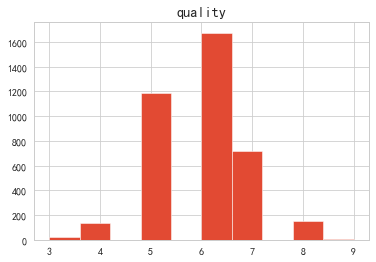

In [157]:
# plt.style.use("ggplot")  
#data.hist(figsize=(20,20), color="#476DD5", edgecolor="k")
data.hist('quality')

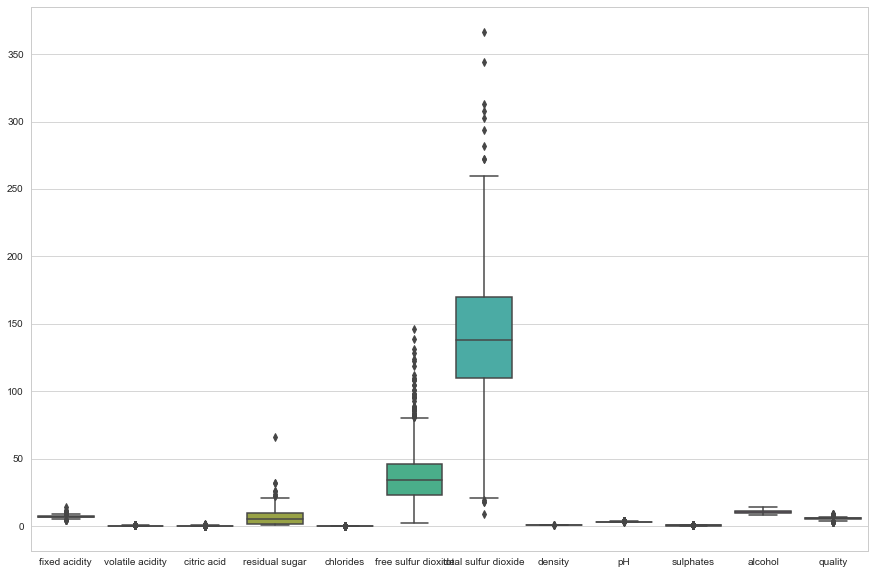

In [129]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.boxplot(data=data)

In [130]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [151]:
data.loc[:,"quality"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

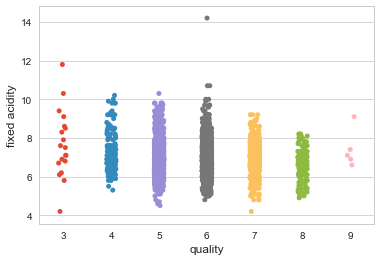

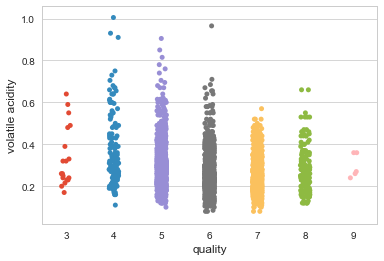

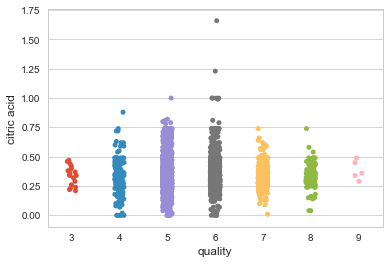

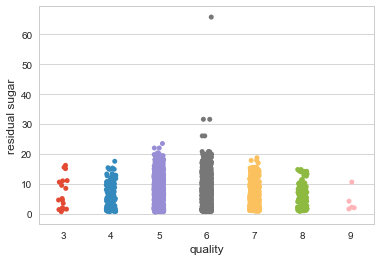

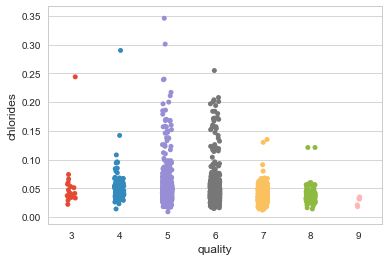

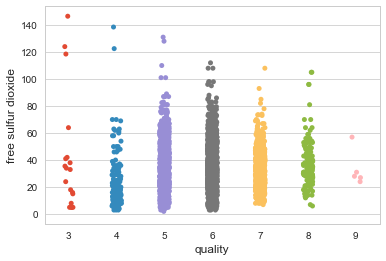

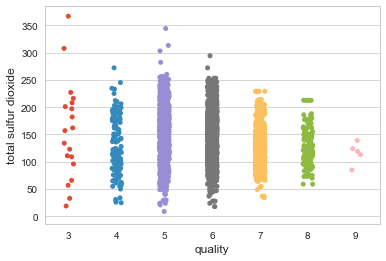

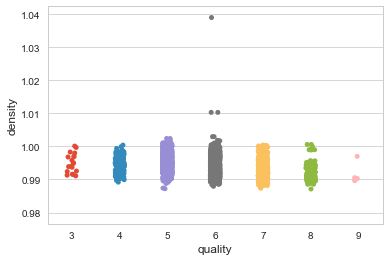

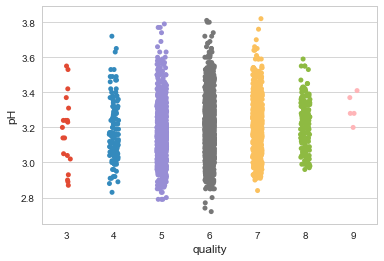

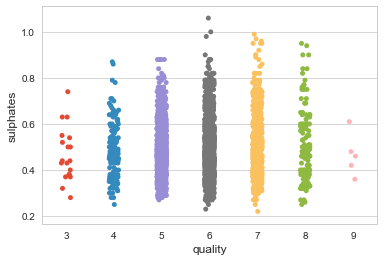

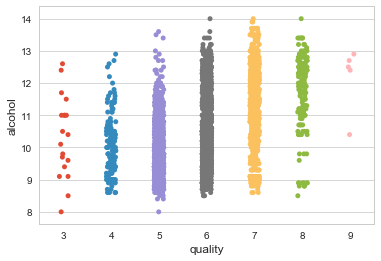

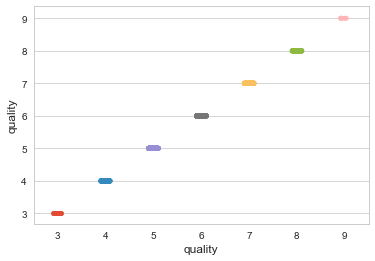

In [131]:
for i in data.columns:
    sns.stripplot(x="quality",y=i,data=data)
    plt.show()

In [132]:
from sklearn.preprocessing import scale
data_scaled = scale(data)
data_scaled

array([[ 0.03970784, -0.05496947,  0.14969839, ..., -0.33898642,
        -1.36561999,  0.13380179],
       [-0.79021804,  0.24450081, -0.01318349, ...,  0.01181177,
        -0.78596143,  0.13380179],
       [ 1.34387709,  0.04485396,  0.47546213, ..., -0.42668597,
        -0.28911124,  0.13380179],
       ...,
       [ 0.03970784, -0.25461631, -0.09462442, ..., -0.33898642,
         1.53267281,  0.13380179],
       [-0.31597468, -0.15479289, -0.42038817, ...,  0.62570859,
        -0.04068614,  0.13380179],
       [ 0.03970784, -0.35443974, -0.33894723, ...,  0.71340814,
        -0.04068614,  0.13380179]])

In [133]:
data_scaled.shape

(3898, 12)

In [134]:
data_scaled

array([[ 0.03970784, -0.05496947,  0.14969839, ..., -0.33898642,
        -1.36561999,  0.13380179],
       [-0.79021804,  0.24450081, -0.01318349, ...,  0.01181177,
        -0.78596143,  0.13380179],
       [ 1.34387709,  0.04485396,  0.47546213, ..., -0.42668597,
        -0.28911124,  0.13380179],
       ...,
       [ 0.03970784, -0.25461631, -0.09462442, ..., -0.33898642,
         1.53267281,  0.13380179],
       [-0.31597468, -0.15479289, -0.42038817, ...,  0.62570859,
        -0.04068614,  0.13380179],
       [ 0.03970784, -0.35443974, -0.33894723, ...,  0.71340814,
        -0.04068614,  0.13380179]])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

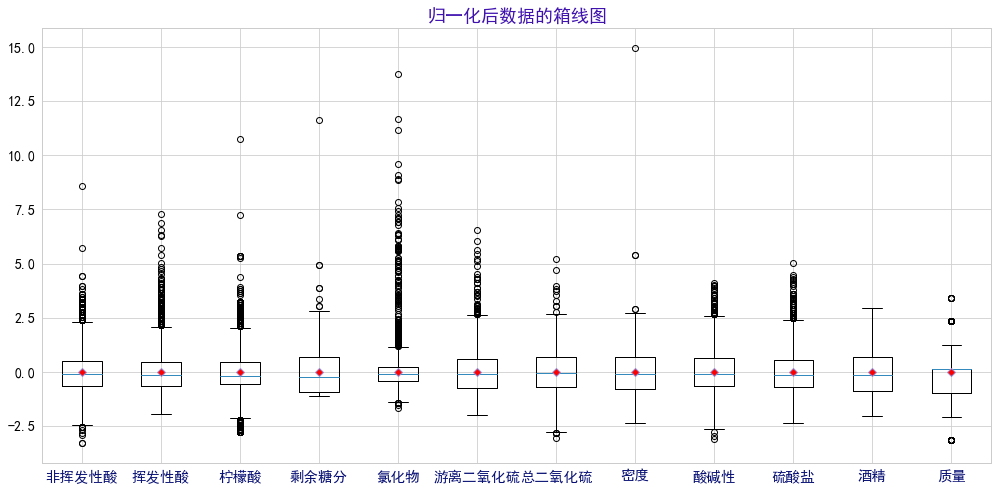

In [143]:
plt.figure(figsize=(17,8))
columns = ["非挥发性酸","挥发性酸","柠檬酸","剩余糖分","氯化物","游离二氧化硫","总二氧化硫",
            "密度","酸碱性","硫酸盐","酒精","质量"]
# sns.boxplot(data_scaled)

plt.boxplot(data_scaled,
            showmeans=True,meanprops={"marker":"D","markerfacecolor":"red"},#设置均值点的属性，点的形状、填充色 
            labels=columns
            )
plt.title("归一化后数据的箱线图",color="#4013AF",size=18)
plt.yticks(fontsize=14,color="k")
plt.xticks(fontsize=14.5,color="#081073")

In [136]:
data_df_scaled = pd.DataFrame(data_scaled)
data_df_scaled.columns = columns
data_df_scaled.sample(4)  #随机抽取5个归一化后的样本数据

,非挥发性酸,挥发性酸,柠檬酸,剩余糖分,氯化物,游离二氧化硫,总二氧化硫,密度,酸碱性,硫酸盐,酒精,质量
1751,-0.315975,-1.153027,-0.501829,-0.759715,0.020648,0.261084,0.280445,-0.710493,1.217074,0.187211,0.787398,1.231822
416,0.513951,-0.653910,-0.583270,-1.014246,-0.208265,-0.504838,-0.965708,-0.509724,-0.021524,-1.391381,-0.537536,0.133802
2027,-0.078853,0.444148,-1.560561,0.336726,0.020648,0.909171,0.903522,0.527581,-0.412660,-0.338986,-1.282812,-0.964218
2304,0.632512,1.442382,-1.153357,-0.975087,0.661604,-1.211843,0.626599,0.059121,-0.868985,-0.777484,-0.868770,0.133802


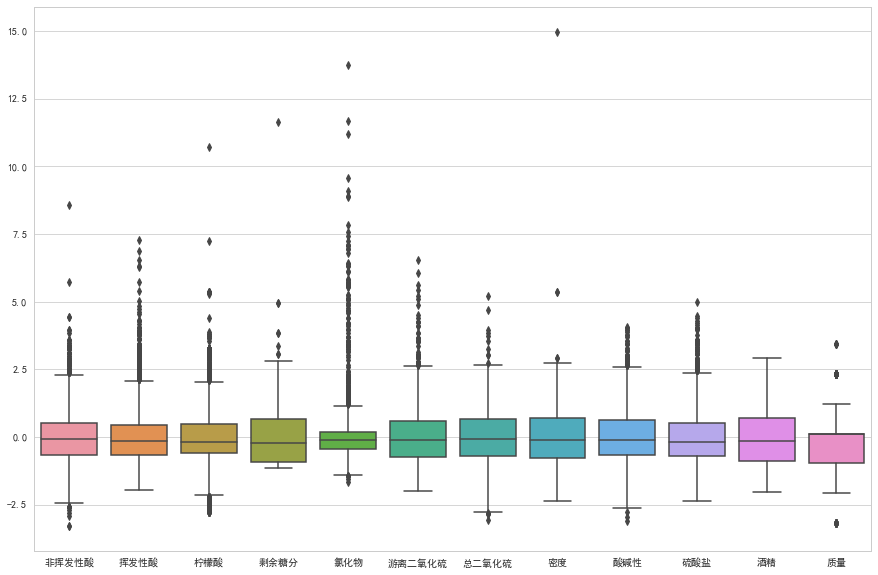

In [149]:
data_df_scaled
plt.rcParams["font.sans-serif"]=["SimHei"] #正常显示中文标签
plt.rcParams["axes.unicode_minus"]=False   #正常显示负号

plt.figure(figsize=(15,10))
sns.boxplot(data=data_df_scaled)

In [137]:
corr_df = data_df_scaled.corr()
corr_df

,非挥发性酸,挥发性酸,柠檬酸,剩余糖分,氯化物,游离二氧化硫,总二氧化硫,密度,酸碱性,硫酸盐,酒精,质量
非挥发性酸,1.000000,0.001852,0.283526,0.078038,0.011019,-0.077129,0.055293,0.232542,-0.440843,-0.018208,-0.073556,-0.125994
挥发性酸,0.001852,1.000000,-0.130598,0.094917,0.077969,-0.091866,0.100011,0.067915,-0.068757,-0.049446,0.031748,-0.193837
柠檬酸,0.283526,-0.130598,1.000000,0.118168,0.107271,0.081765,0.105156,0.153867,-0.179736,0.054652,-0.065501,-0.022072
剩余糖分,0.078038,0.094917,0.118168,1.000000,0.091696,0.316906,0.415327,0.840133,-0.176952,-0.036007,-0.440183,-0.110106
氯化物,0.011019,0.077969,0.107271,0.091696,1.000000,0.105326,0.210686,0.263469,-0.068132,0.029289,-0.360915,-0.210434
游离二氧化硫,-0.077129,-0.091866,0.081765,0.316906,0.105326,1.000000,0.618634,0.302169,0.001218,0.051732,-0.258914,0.017685
总二氧化硫,0.055293,0.100011,0.105156,0.415327,0.210686,0.618634,1.000000,0.536789,0.000988,0.148053,-0.456757,-0.170557
密度,0.232542,0.067915,0.153867,0.840133,0.263469,0.302169,0.536789,1.000000,-0.066131,0.085976,-0.765232,-0.321771
酸碱性,-0.440843,-0.068757,-0.179736,-0.176952,-0.068132,0.001218,0.000988,-0.066131,1.000000,0.184499,0.087052,0.118126
硫酸盐,-0.018208,-0.049446,0.054652,-0.036007,0.029289,0.051732,0.148053,0.085976,0.184499,1.000000,-0.036600,0.058870


In [138]:
corr_df["质量"].sort_values(ascending=False)

质量        1.000000
酒精        0.454518
酸碱性       0.118126
硫酸盐       0.058870
游离二氧化硫    0.017685
柠檬酸      -0.022072
剩余糖分     -0.110106
非挥发性酸    -0.125994
总二氧化硫    -0.170557
挥发性酸     -0.193837
氯化物      -0.210434
密度       -0.321771
Name: 质量, dtype: float64

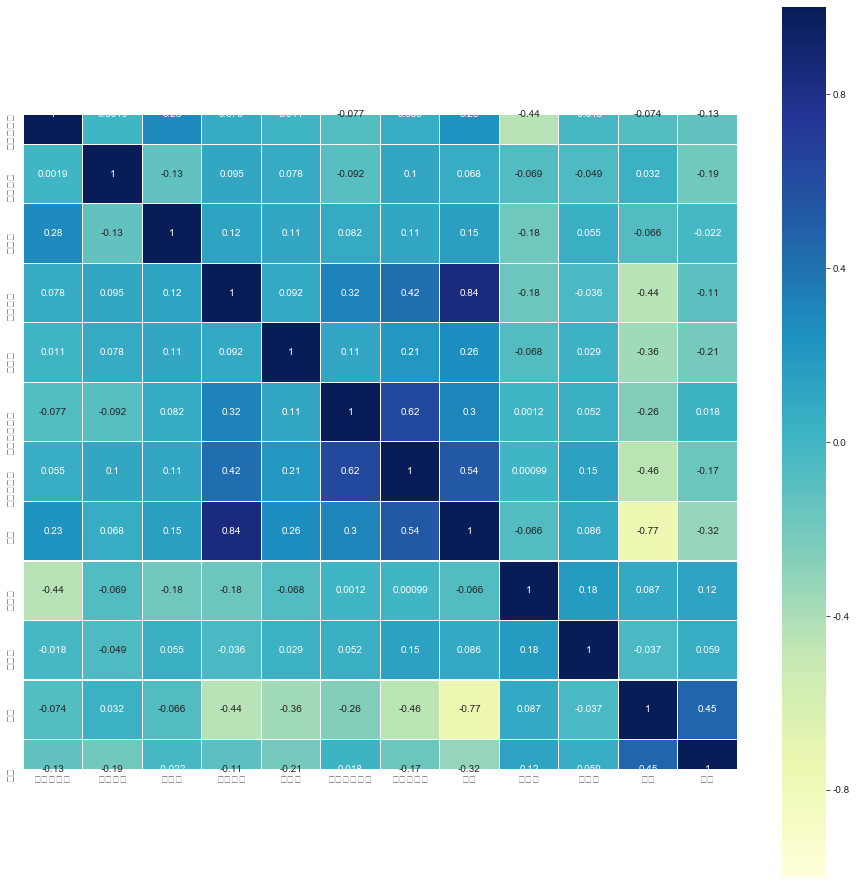

In [139]:
plt.figure(figsize=(16,16))
sns.heatmap(corr_df,linewidths=0.1,square=True,linecolor="white",annot=True,cmap='YlGnBu',vmin=-1,vmax=1)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y = digits.data, digits.target
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [3]:
gnb = GaussianNB().fit(Xtrain,Ytrain)
#查看分数
acc_score = gnb.score(Xtest,Ytest)
acc_score
#查看预测结果
Y_pred = gnb.predict(Xtest)
#查看预测的概率结果
prob = gnb.predict_proba(Xtest)
prob.shape
prob.shape #每一列对应一个标签下的概率
prob[1,:].sum() #每一行的和都是一
prob.sum(axis=1)
from sklearn.metrics import confusion_matrix as CM
CM(Ytest,Y_pred)
#注意，ROC曲线是不能用于多分类的。多分类状况下最佳的模型评估指标是混淆矩阵和整体的准确度Ts

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]], dtype=int64)

In [6]:
import numpy as np
from collections import Counter
from sklearn import datasets
 

class NaiveBayes:
    def __init__(self, lamb=1):
        self.lamb = lamb  # 贝叶斯估计的参数
        self.prior = dict()  # 存储先验概率
        self.conditional = dict()  # 存储条件概率
 
    def training(self, features, target):
        """
        根据朴素贝叶斯算法原理,使用 贝叶斯估计 计算先验概率和条件概率
        特征集集为离散型数据,预测类别为多元.  数据集格式为np.array
        :param features: 特征集m*n,m为样本数,n为特征数
        :param target: 标签集m*1
        :return: 不返回任何值,更新成员变量
        """
        features = np.array(features)
        target = np.array(target).reshape(features.shape[0], 1)
        m, n = features.shape
        labels = Counter(target.flatten().tolist())  # 计算各类别的样本个数
        k = len(labels.keys())  # 类别数
        for label, amount in labels.items():
            self.prior[label] = (amount + self.lamb) / (m + k * self.lamb)  # 计算平滑处理后的先验概率
        for feature in range(n):  # 遍历每个特征
            self.conditional[feature] = {}
            values = np.unique(features[:, feature])
            for value in values:  # 遍历每个特征值
                self.conditional[feature][value] = {}
                for label, amount in labels.items():  # 遍历每种类别
                    feature_label = features[target[:, 0] == label, :]  # 截取该类别的数据集
                    c_label = Counter(feature_label[:, feature].flatten().tolist())  # 计算该类别下各特征值出现的次数
                    self.conditional[feature][value][label] = (c_label.get(value, 0) + self.lamb) / \
                                                              (amount + len(values) * self.lamb)  # 计算平滑处理后的条件概率
        return
 
    def predict(self, features):
        """预测单个样本"""
        best_poster, best_label = -np.inf, -1
        for label in self.prior:
            poster = np.log(self.prior[label])  # 初始化后验概率为先验概率,同时把连乘换成取对数相加，防止下溢（即太多小于1的数相乘，结果会变成0）
            for feature in range(features.shape[0]):
                poster += np.log(self.conditional[feature][features[feature]][label])
            if poster > best_poster:  # 获取后验概率最大的类别
                best_poster = poster
                best_label = label
        return best_label
 
 
def test():
    dataset = pd.read_excel("./change.xlsx",sheet_name="红酒品质数据集")
    #dataset = datasets.load_iris()  # 鸢尾花数据集
    #dataset = np.concatenate((dataset['data'], dataset['target'].reshape(-1, 1)), axis=1)  # 组合数据
    dataset=dataset.values
    np.random.shuffle(dataset)  # 打乱数据
    features = dataset[:, :-1]
    target = dataset[:, -1:]
    nb = NaiveBayes()
    nb.training(features, target)
    prediction = []
    for features in features:
        prediction.append(nb.predict(features))
    correct = [1 if a == b else 0 for a, b in zip(prediction, target)]
    print(correct.count(1) / len(correct))  # 计算准确率
    return prediction
 
pre=test()

0.7272960492560288


In [9]:
pre=np.array(pre)

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [14]:
pre[pre==6]

array([6., 6., 6., ..., 6., 6., 6.])

In [ ]:
dataset = pd.read_excel("./change.xlsx",sheet_name="红酒品质数据集")

In [6]:
dataset.shape

(3898, 12)

In [7]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
dataset.iloc[:,1:11].values

array([[ 0.27,  0.36, 20.7 , ...,  3.  ,  0.45,  8.8 ],
       [ 0.3 ,  0.34,  1.6 , ...,  3.3 ,  0.49,  9.5 ],
       [ 0.28,  0.4 ,  6.9 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 0.25,  0.33,  2.1 , ...,  3.26,  0.45, 12.3 ],
       [ 0.26,  0.29,  7.7 , ...,  3.23,  0.56, 10.4 ],
       [ 0.24,  0.3 , 12.3 , ...,  2.99,  0.57, 10.4 ]])

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# digits = load_digits()
# X, y = digits.data, digits.target
X, y =dataset.iloc[:,1:11].values, dataset.loc[:,"quality"].values
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [23]:
gnb = GaussianNB().fit(Xtrain,Ytrain)
#查看分数
acc_score = gnb.score(Xtest,Ytest)
acc_score
#查看预测结果
Y_pred = gnb.predict(Xtest)
#查看预测的概率结果
prob = gnb.predict_proba(Xtest)
prob.shape
prob.shape #每一列对应一个标签下的概率
prob[1,:].sum() #每一行的和都是一
prob.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [24]:
from sklearn.metrics import confusion_matrix as CM
CM(Ytest,Y_pred)

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   8,  13,  12,   8,   3,   0],
       [  7,  10, 177, 118,  42,   1,   0],
       [  6,   2, 130, 176, 179,   2,   0],
       [  0,   0,  16,  52, 152,  11,   0],
       [  1,   0,   3,  10,  24,   4,   0],
       [  0,   0,   0,   0,   2,   1,   0]], dtype=int64)

In [30]:
prob.shape


(1170, 7)

In [29]:

prob.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [31]:
acc_score

0.44188034188034186

In [32]:
Y_pred

array([7, 6, 7, ..., 6, 7, 7], dtype=int64)

In [16]:
from sklearn.linear_model import RidgeCV
R1_CV = RidgeCV(cv=10).fit(xx_train, yy_train)
yyR1_pred = R1_CV.predict(xx_test)
print("均方误差：",mean_squared_error(yy_test, yyR1_pred))
Coef3_df = pd.DataFrame(R1_CV.coef_,index=columns[0:11],columns=["回归系数"])
Coef3_df.sort_values(by="回归系数",ascending=False)

NameError: name 'xx_train' is not defined

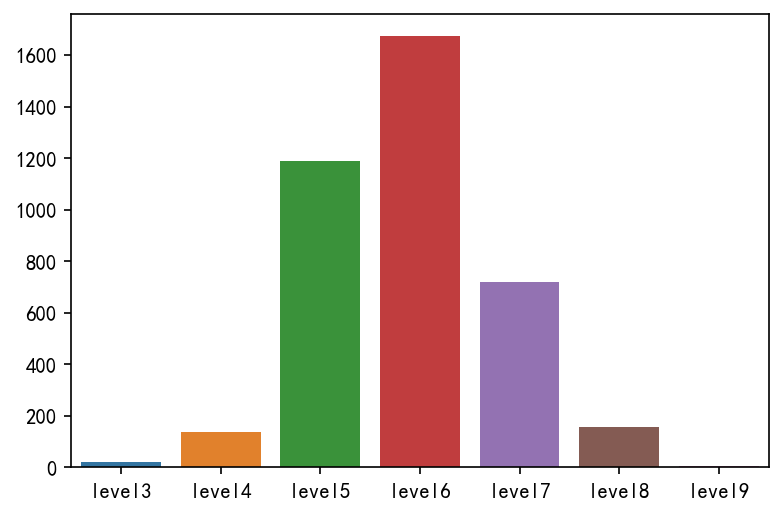

In [18]:
import seaborn as sns
plt.figure(dpi=150)
x = ['level3','level4','level5','level6','level7','level8','level9']
y = [20,
138,
1189,
1675,
720,
156,
6
]
sns.barplot(x, y, order=['level3','level4','level5','level6','level7','level8','level9'])